# Disease Spread Modeling With Monte Carlo Simulations
The real world is full of uncertainty and randomness. This is where Monte Carlo Simulations come in. Monte Carlo helps us model uncertainty and randomness in our models. This is one example of how Monte Carlo Simulations can be used to model disease spread. Lets focus on the newest and most discussed virus, Covid-19.

## Parameters
There are few parameters we need to set before we start simulating.

- infection_prob: The probability of infection per contact
- mortality_prob: The probability of mortality per infection
- contacts_per_day: The number of contacts between people per day
- days: The number of days to simulate
- resolution_duration: The duration of the resolution. Resolution here implies the virus leaves the body, in either a recovery or death.

We will be utilizing the random module to generate random numbers between 0 to 1 (serving as probabilities) to model the randomness of everyday life.



In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

# fitted for covid-19
initial_infected = 10
population = 10000
infection_prob = 0.035
mortality_prob = 0.01
contacts_per_day = 7
days = 180
resolution_duration = 13

Next, lets model one scenario of the disease spread.

In [15]:
def simulation():
    states = np.zeros(population)
    states[:initial_infected] = 1

    susceptible = []
    infected = []
    recovered = []
    dead = []
    # simulates the disease spread over the specified number of days
    for _ in range(days):
        susceptible.append(np.sum(states == 0))
        infected.append(np.sum(states == 1))
        recovered.append(np.sum(states == 2))
        dead.append(np.sum(states == 3))
        new_states = states.copy()

        infected_indices = np.where(states == 1)[0]
        alive_indices = np.where(states != 3)[0]

        for i in infected_indices:
            for _ in range(contacts_per_day):
                if random.random() < 0.95: # 95% chance of local contact (everday life)
                    offset = random.randint(-50, 50) # local contact
                    target = (i + offset) % population
                else: #special occasions (eg. Travel, Gatherings)
                    target = random.choice(alive_indices) # long-range contact
                if random.random() < infection_prob and states[target] == 0: # target is susceptible
                    new_states[target] = 1

            if random.random() < 1 / resolution_duration: # disease resolution. Some die some recover
                if random.random() < mortality_prob:
                    new_states[i] = 3
                else:
                    new_states[i] = 2

        states = new_states

    return susceptible, infected, recovered, dead

We can also plot this to see how the number of susceptible, infected, recovered, and dead looks like. Lets also run this scenario 10 times to see the general trend of the Covid virus. Since there are random factors, every result will vary slightly.

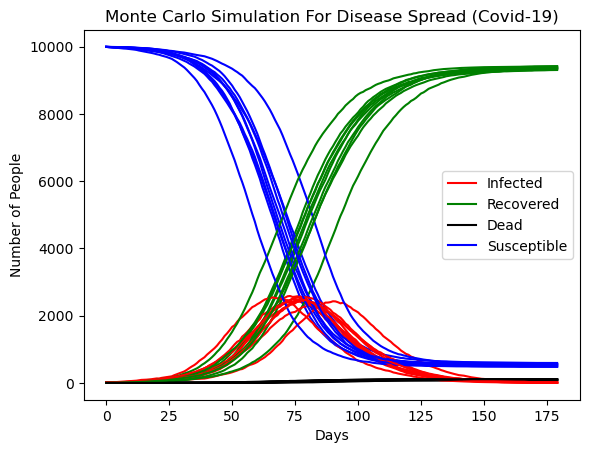

Average Susceptible: 531.2
Average Infected: 9.4
Average Recovered: 9363.6
Average Dead: 95.8


In [16]:
def plot_results():
    susceptible_end = []
    infected_end = []
    recovered_end = []
    dead_end = []

    for i in range(10):
        susceptible, infected, recovered, dead = simulation()
        if i == 0:
            plt.plot(infected, label="Infected", color="red")
            plt.plot(recovered, label="Recovered", color="green")
            plt.plot(dead, label="Dead", color="black")
            plt.plot(susceptible, label="Susceptible", color="blue")
        else:
            plt.plot(infected, color="red")
            plt.plot(recovered, color="green")
            plt.plot(dead, color="black")
            plt.plot(susceptible, color="blue")
        susceptible_end.append(susceptible[-1])
        infected_end.append(infected[-1])
        recovered_end.append(recovered[-1])
        dead_end.append(dead[-1])
    plt.legend()
    plt.title("Monte Carlo Simulation For Disease Spread (Covid-19)")
    plt.xlabel("Days")
    plt.ylabel("Number of People")
    plt.show()
    print(f"Average Susceptible: {np.mean(susceptible_end)}")
    print(f"Average Infected: {np.mean(infected_end)}")
    print(f"Average Recovered: {np.mean(recovered_end)}")
    print(f"Average Dead: {np.mean(dead_end)}")

plot_results()

Using Monte Carlo simulations, we can analyze our results.

The total number of people that caught the Covid disease is:

$$ \text{Attack Rate} = \frac{\text{Recovered} + \text{Dead}}{\text{Total Population}} $$

$$ \frac{9365.1 + 91.8}{10,000} = \mathbf{94.57\%} $$

This indicates that the Covid virus is highly contagious.

Lets look at mortality rate. Even though we set that already, we can recalculate it again to see if our model is actually working.

$$ \text{CFR} = \frac{\text{Dead}}{\text{Recovered} + \text{Dead}} $$

$$ \frac{91.8}{9456.9} \approx \mathbf{0.97\%} $$

This is very close to the mortality rate we set up earlier.

We have a few susceptible people that never got affected. This can be explained by the lowering number of infected people on top of people usually interacting within a certain group of people earlier (the 95% local contact we set up earlier)

This model is highly applicable and versatile. Lets model the ebola virus using this model next. We can do this by simply restating our initial parameters.

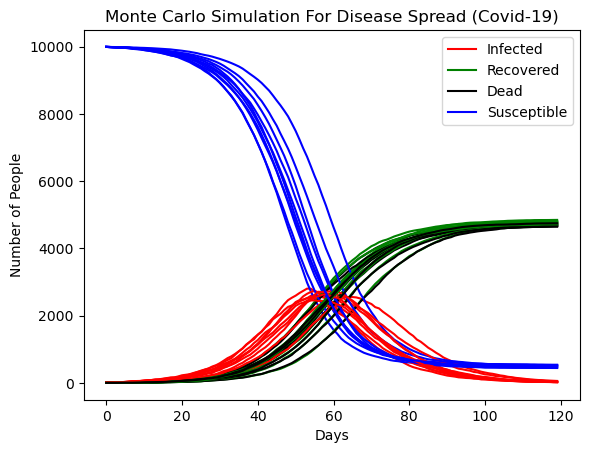

Average Susceptible: 495.9
Average Infected: 32.4
Average Recovered: 4779.1
Average Dead: 4692.6


In [19]:
initial_infected = 10
population = 10000
infection_prob = 0.16 # lower due to requirement of bodily fluid contact
mortality_prob = 0.5 # ebola has a much higher mortality rate
contacts_per_day = 2 # contacts per day is drastically reduced due to them usually being in isolated areas (hospitals)
days = 120
resolution_duration = 10

plot_results()

We can see the graph for ebola is very different, with it infecting almost everybody and wiping out half of our population.

$$ \text{Attack Rate} = \frac{\text{Recovered} + \text{Dead}}{\text{Total Population}} $$

$$ \frac{4779.1 + 4692.6}{10,000} = \mathbf{94.71\%} $$
